Data Preparation
Dataset loaded from: ./cnn_dataset_1/

--- Dataset Analysis ---
Total number of samples: 100800
Number of classes: 36
Class names (first 5): ['0', '1', '2', '3', '4']...
Class names (last 5): ['V', 'W', 'X', 'Y', 'Z']
Number of samples per class (first 5)-
  Class '0': 2800 samples
  Class '1': 2800 samples
  Class '2': 2800 samples
  Class '3': 2800 samples
  Class '4': 2800 samples
  ...
  Class 'V': 2800 samples
  Class 'W': 2800 samples
  Class 'X': 2800 samples
  Class 'Y': 2800 samples
  Class 'Z': 2800 samples

Description
This dataset is a multi-class image classification dataset consisting of 100,800 samples across 36 distinct categories.
Each image is a 28x28 pixel RGB image (assuming 3 channels based on common datasets, adjust if grayscale).
With 2800 examples per category, the dataset is perfectly balanced across all classes.

Dataset Visualizations
Displaying a grid of sample images (one per class)...


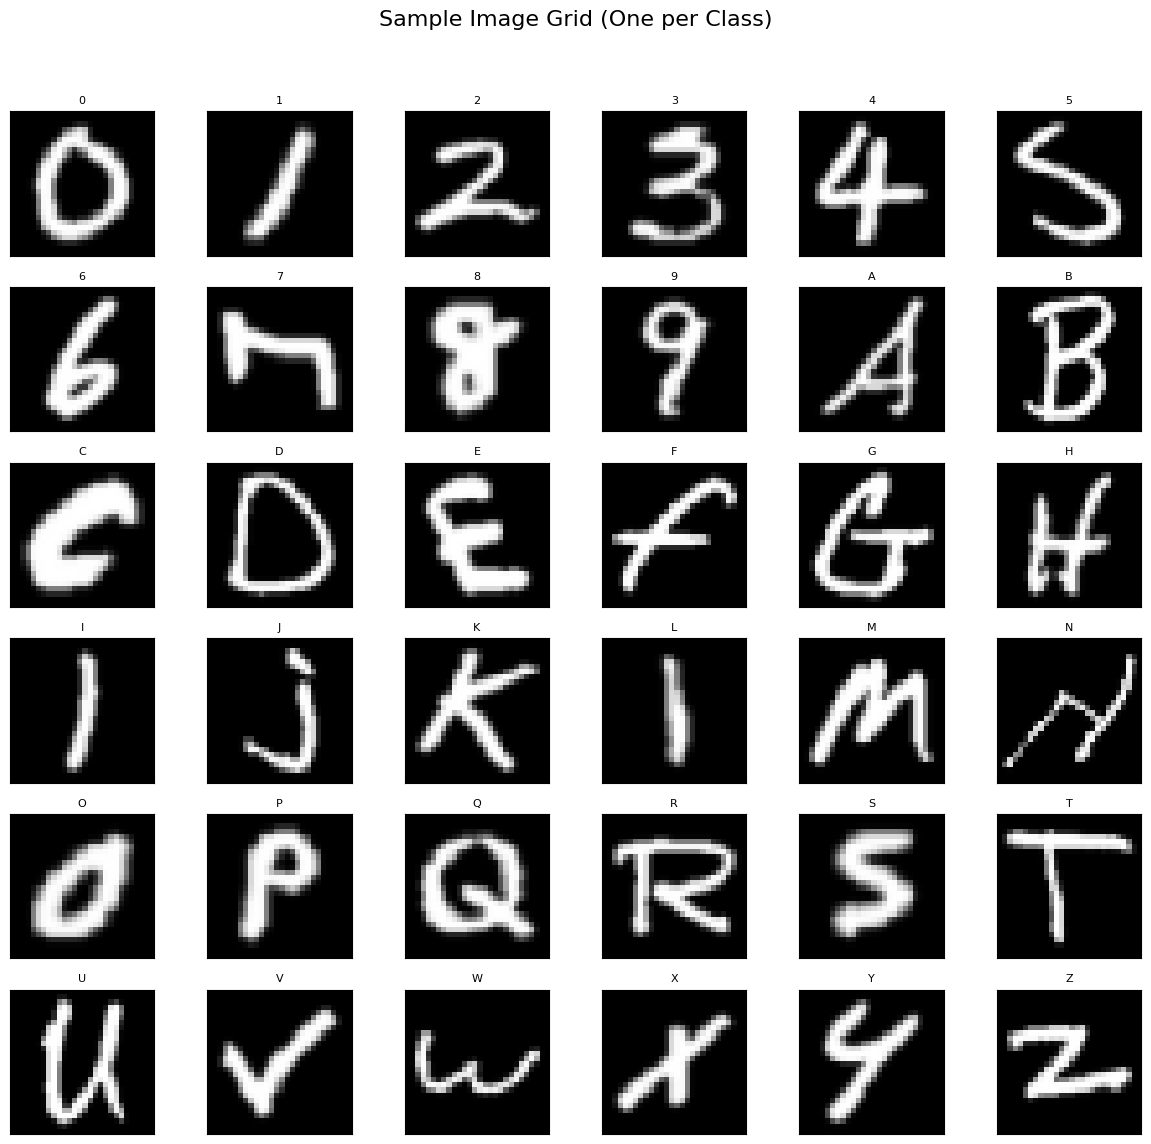

Grid of sample images from each class
Displaying bar chart of images per class...


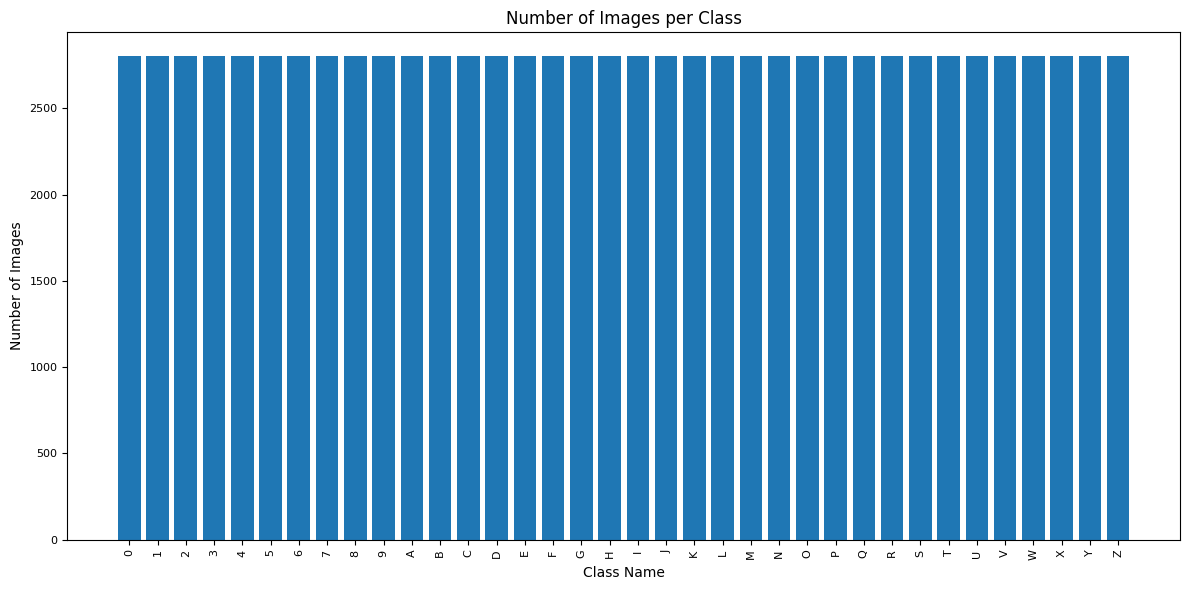

Bar chart showing the number of images per class, confirming balance
Displaying histogram of pixel values for a sample image


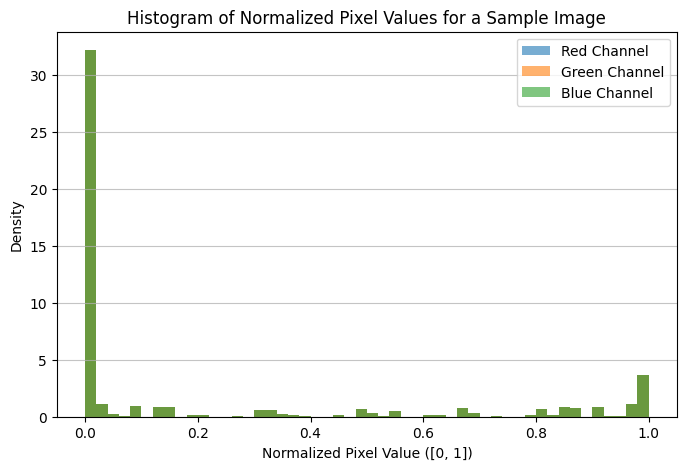

Histogram of pixel values for a sample image, showing distribution after ToTensor().

--- Dataset Preprocessing ---
Pixel values normalized to [0, 1] by ToTensor().
Target labels are already numerical class indices by ImageFolder.
Dataset is balanced (2800 samples per class), so no class imbalance handling needed.

--- Dataset Splitting ---
Train samples: 70560 (70.0%)
Validation samples: 15120 (15.0%)
Test samples: 15120 (15.0%)
Batch size: 64
Detected input image channels: 3

Data preparation complete. DataLoaders and metadata saved to 'dataset_loaders.pth'.


In [2]:

import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
from torchvision.datasets import ImageFolder
import matplotlib.pyplot as plt
import numpy as np
import os
from collections import Counter
from PIL import Image

print("Data Preparation")

# --- Configuration ---
data_root = './cnn_dataset_1/' 
batch_size = 64
train_ratio = 0.7
val_ratio = 0.15
test_ratio = 0.15
seed = 42 


initial_transform = transforms.Compose([
    transforms.Resize((28, 28)), 
    transforms.ToTensor()        
])

try:
    full_dataset = ImageFolder(root=data_root, transform=initial_transform)
    num_classes = len(full_dataset.classes)
    class_names = full_dataset.classes
    print(f"Dataset loaded from: {data_root}")
except Exception as e:
    print(f"Error loading dataset. Please check 'data_root' path and dataset structure: {e}")
    print(f"Expected structure: {data_root}/A/, {data_root}/B/, ...")
    exit() 


print("\n--- Dataset Analysis ---")
print(f"Total number of samples: {len(full_dataset)}")
print(f"Number of classes: {num_classes}")
print(f"Class names (first 5): {class_names[:5]}...")
print(f"Class names (last 5): {class_names[-5:]}")


class_counts = Counter(full_dataset.targets)
print(f"Number of samples per class (first 5)-")
for i in range(min(5, num_classes)):
    print(f"  Class '{class_names[i]}': {class_counts[i]} samples")
if num_classes > 5:
    print("  ...")
    for i in range(max(0, num_classes-5), num_classes):
        print(f"  Class '{class_names[i]}': {class_counts[i]} samples")

print("\nDescription")
print("This dataset is a multi-class image classification dataset consisting of 100,800 samples across 36 distinct categories.")
print("Each image is a 28x28 pixel RGB image (assuming 3 channels based on common datasets, adjust if grayscale).")
print("With 2800 examples per category, the dataset is perfectly balanced across all classes.")



print("\nDataset Visualizations")

print("Displaying a grid of sample images (one per class)...")
fig_grid = plt.figure(figsize=(12, 12))
rows_grid, cols_grid = int(np.ceil(num_classes**0.5)), int(np.ceil(num_classes**0.5)) 

samples_per_class_for_display = {}
for idx, target in enumerate(full_dataset.targets):
    if target not in samples_per_class_for_display:
        samples_per_class_for_display[target] = idx
    if len(samples_per_class_for_display) == num_classes:
        break # Found one for each class

for i, class_idx in enumerate(sorted(samples_per_class_for_display.keys())):
    img_tensor, _ = full_dataset[samples_per_class_for_display[class_idx]]
    ax = fig_grid.add_subplot(rows_grid, cols_grid, i + 1, xticks=[], yticks=[])
    img = img_tensor.permute(1, 2, 0).numpy() 

    ax.imshow(img)
    ax.set_title(class_names[class_idx], fontsize=8)
plt.suptitle("Sample Image Grid (One per Class)", y=0.98, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.show()
print("Grid of sample images from each class")


print("Displaying bar chart of images per class...")
counts = [class_counts[i] for i in range(num_classes)]
plt.figure(figsize=(12, 6))
plt.bar(class_names, counts)
plt.xlabel("Class Name")
plt.ylabel("Number of Images")
plt.title("Number of Images per Class")
plt.xticks(rotation=90, fontsize=8) 
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()
print("Bar chart showing the number of images per class, confirming balance")


print("Displaying histogram of pixel values for a sample image")
sample_image_tensor, _ = full_dataset[0] 
plt.figure(figsize=(8, 5))
if sample_image_tensor.shape[0] == 3: 
    for i, color_channel in enumerate(['Red', 'Green', 'Blue']):
        plt.hist(sample_image_tensor[i].numpy().flatten(), bins=50, alpha=0.6, label=f'{color_channel} Channel', density=True)
else: 
    plt.hist(sample_image_tensor.numpy().flatten(), bins=50, alpha=0.7, label='Grayscale Channel', density=True)

plt.xlabel("Normalized Pixel Value ([0, 1])")
plt.ylabel("Density")
plt.title("Histogram of Normalized Pixel Values for a Sample Image")
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()
print("Histogram of pixel values for a sample image, showing distribution after ToTensor().")

print("\n--- Dataset Preprocessing ---")
print("Pixel values normalized to [0, 1] by ToTensor().")
print("Target labels are already numerical class indices by ImageFolder.")
print("Dataset is balanced (2800 samples per class), so no class imbalance handling needed.")


print("\n--- Dataset Splitting ---")
total_size = len(full_dataset)
train_size = int(train_ratio * total_size)
val_size = int(val_ratio * total_size)
test_size = total_size - train_size - val_size 

train_dataset, val_dataset, test_dataset = random_split(
    full_dataset, [train_size, val_size, test_size],
    generator=torch.Generator().manual_seed(seed)
)

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=0)


print(f"Train samples: {len(train_dataset)} ({train_ratio*100:.1f}%)")
print(f"Validation samples: {len(val_dataset)} ({val_ratio*100:.1f}%)")
print(f"Test samples: {len(test_dataset)} ({test_ratio*100:.1f}%)")
print(f"Batch size: {batch_size}")

sample_image_tensor, _ = full_dataset[0]
input_channels = sample_image_tensor.shape[0] 
print(f"Detected input image channels: {input_channels}") 

torch.save({
    'train_loader': train_loader,
    'val_loader': val_loader,
    'test_loader': test_loader,
    'num_classes': num_classes,
    'class_names': class_names,
    'input_channels': input_channels 
}, 'dataset_loaders.pth')

print("\nData preparation complete. DataLoaders and metadata saved to 'dataset_loaders.pth'.")

In [3]:

import torch
import torch.nn as nn
import torch.nn.functional as F
from torchinfo import summary

print("Implementing a Basic CNN")


try:
    loaded_data = torch.load('dataset_loaders.pth', weights_only=False)
    num_classes = loaded_data['num_classes']
    input_channels = loaded_data['input_channels']
    sample_batch_size = loaded_data['train_loader'].batch_size 
except FileNotFoundError:
    print("Error: 'dataset_loaders.pth' not found. Please run step1_data_preparation.py first.")
    exit()

class CustomCNN(nn.Module):
    def __init__(self, num_classes=36, input_channels=3):
        super(CustomCNN, self).__init__()
        
        self.conv1 = nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, stride=1, padding=1)
  
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(in_features=64 * 7 * 7, out_features=512)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(0.5) 
        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)

    def forward(self, x):

        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)


        x = x.view(-1, 64 * 7 * 7) 


        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout(x) 

        x = self.fc2(x) 
        return x


model = CustomCNN(num_classes=num_classes, input_channels=input_channels)

print("\nModel Architecture Summary ")
summary(model, input_size=(sample_batch_size, input_channels, 28, 28))

torch.save(model.state_dict(), 'initial_model_weights.pth')
print("\nModel architecture defined. Initial weights saved to 'initial_model_weights.pth'.")


Implementing a Basic CNN

Model Architecture Summary 

Model architecture defined. Initial weights saved to 'initial_model_weights.pth'.


In [5]:

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os

print("Training and Optimization")

try:
    loaded_data = torch.load('dataset_loaders.pth', weights_only=False)
    train_loader = loaded_data['train_loader']
    val_loader = loaded_data['val_loader']
    num_classes = loaded_data['num_classes']
    input_channels = loaded_data['input_channels']
except FileNotFoundError:
    print("Error: 'dataset_loaders.pth' not found. Please run step1_data_preparation.py first.")
    exit()

class CustomCNN(nn.Module):
    def __init__(self, num_classes=36, input_channels=3):
        super(CustomCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(in_features=64 * 7 * 7, out_features=512)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = x.view(-1, 64 * 7 * 7)

        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout(x)

        x = self.fc2(x)
        return x


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


num_epochs = 20
learning_rate = 0.001
best_model_weights_path = 'best_cnn_model.pth'

results = {}
best_overall_val_accuracy = -1.0
best_overall_optimizer_name = None


optimizers_configs = {
    "Adam": {'optimizer_class': optim.Adam, 'lr': learning_rate, 'weight_decay': 0},
    "AdamW": {'optimizer_class': optim.AdamW, 'lr': learning_rate, 'weight_decay': 0.001}, 
    "SGD_Momentum": {'optimizer_class': optim.SGD, 'lr': 0.01, 'momentum': 0.9, 'weight_decay': 0}
}

for opt_name, config in optimizers_configs.items():
    print(f"\nTraining with {opt_name} ooptimizer")

    model = CustomCNN(num_classes=num_classes, input_channels=input_channels)
    model.to(device)

    try:
        model.load_state_dict(torch.load('initial_model_weights.pth', map_location=device))
        print(f"  Loaded initial model weights for {opt_name} experiment.")
    except FileNotFoundError:
        print(f"  Warning: 'initial_model_weights.pth' not found. Starting {opt_name} training from random initialization.")

    optimizer = config['optimizer_class'](model.parameters(), lr=config['lr'], **{k: v for k, v in config.items() if k not in ['optimizer_class', 'lr']})
    criterion = nn.CrossEntropyLoss()

    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []
    current_best_val_accuracy = -1.0 

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total_train += labels.size(0)
            correct_train += (predicted == labels).sum().item()

        epoch_train_loss = running_loss / len(train_loader)
        epoch_train_accuracy = 100 * correct_train / total_train
        train_losses.append(epoch_train_loss)
        train_accuracies.append(epoch_train_accuracy)

        model.eval()
        val_loss = 0.0
        correct_val = 0
        total_val = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs.data, 1)
                total_val += labels.size(0)
                correct_val += (predicted == labels).sum().item()

        epoch_val_loss = val_loss / len(val_loader)
        epoch_val_accuracy = 100 * correct_val / total_val
        val_losses.append(epoch_val_loss)
        val_accuracies.append(epoch_val_accuracy)

        print(f'  Epoch {epoch+1}/{num_epochs}: '
              f'Train Loss: {epoch_train_loss:.4f}, Train Acc: {epoch_train_accuracy:.2f}% | '
              f'Val Loss: {epoch_val_loss:.4f}, Val Acc: {epoch_val_accuracy:.2f}%')

        if epoch_val_accuracy > current_best_val_accuracy:
            current_best_val_accuracy = epoch_val_accuracy
        if epoch_val_accuracy > best_overall_val_accuracy:
            best_overall_val_accuracy = epoch_val_accuracy
            best_overall_optimizer_name = opt_name
            torch.save(model.state_dict(), best_model_weights_path)
            print(f"  --> NEW GLOBAL BEST: Saved model for {opt_name} with Val Acc: {best_overall_val_accuracy:.2f}%")


    results[opt_name] = {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'train_accuracies': train_accuracies,
        'val_accuracies': val_accuracies,
        'final_val_accuracy': current_best_val_accuracy 
    }

print(f"Overall Best Optimizer: '{best_overall_optimizer_name}' with a Validation Accuracy of {best_overall_val_accuracy:.2f}%.")

for opt_name, res in results.items():
    print(f"- Optimizer: {opt_name}, Best Validation Accuracy: {res['final_val_accuracy']:.2f}%")


torch.save(results, 'training_results.pth')
print("\nTraining and optimization complete. Training results saved to 'training_results.pth'.")


Training and Optimization

Training with Adam ooptimizer
  Loaded initial model weights for Adam experiment.
  Epoch 1/20: Train Loss: 0.7056, Train Acc: 77.36% | Val Loss: 0.3240, Val Acc: 88.55%
  --> NEW GLOBAL BEST: Saved model for Adam with Val Acc: 88.55%
  Epoch 2/20: Train Loss: 0.3810, Train Acc: 86.58% | Val Loss: 0.2734, Val Acc: 90.23%
  --> NEW GLOBAL BEST: Saved model for Adam with Val Acc: 90.23%
  Epoch 3/20: Train Loss: 0.3215, Train Acc: 88.30% | Val Loss: 0.2529, Val Acc: 90.56%
  --> NEW GLOBAL BEST: Saved model for Adam with Val Acc: 90.56%
  Epoch 4/20: Train Loss: 0.2844, Train Acc: 89.31% | Val Loss: 0.2532, Val Acc: 90.73%
  --> NEW GLOBAL BEST: Saved model for Adam with Val Acc: 90.73%
  Epoch 5/20: Train Loss: 0.2602, Train Acc: 90.07% | Val Loss: 0.2409, Val Acc: 91.20%
  --> NEW GLOBAL BEST: Saved model for Adam with Val Acc: 91.20%
  Epoch 6/20: Train Loss: 0.2405, Train Acc: 90.75% | Val Loss: 0.2381, Val Acc: 91.26%
  --> NEW GLOBAL BEST: Saved model for

 Evaluation and Analysis
Best model loaded from 'best_cnn_model.pth'.

Model Evaluation Results
Final Training Loss: 0.1083, Training Accuracy: 95.36%
Final Validation Loss: 0.2470, Validation Accuracy: 92.02%
Final Testing Loss: 0.2529, Testing Accuracy: 91.41%

Short Analysis:
The model achieved a test accuracy of 91.41%.
The training, validation, and test accuracies are relatively close, indicating good generalization and limited overfitting.
The model's performance (91.41%) meets the expected accuracy target of > 85%.

 Training History Plots
Displaying plots for the best performing optimizer AdamW


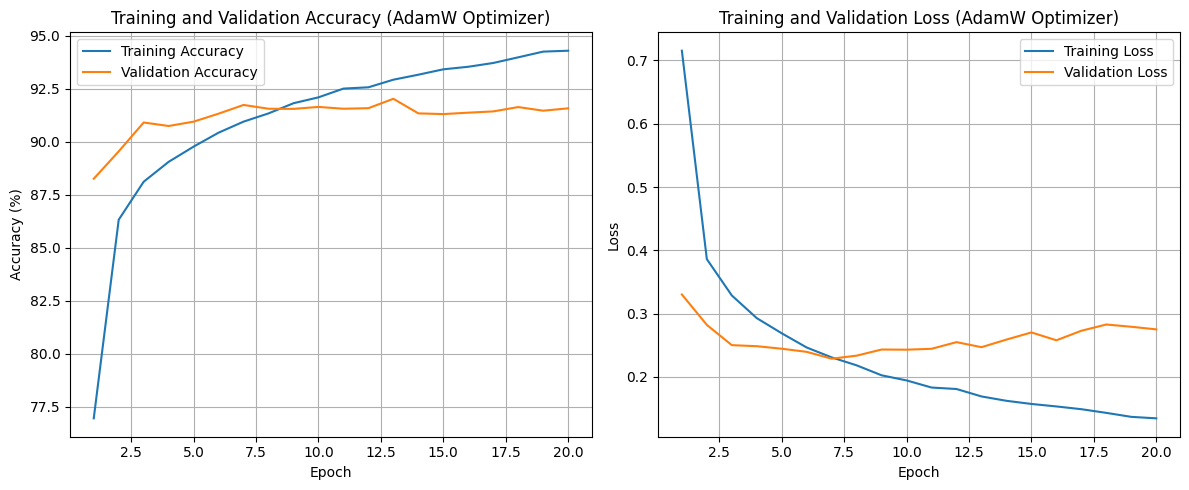


confusion Matrix


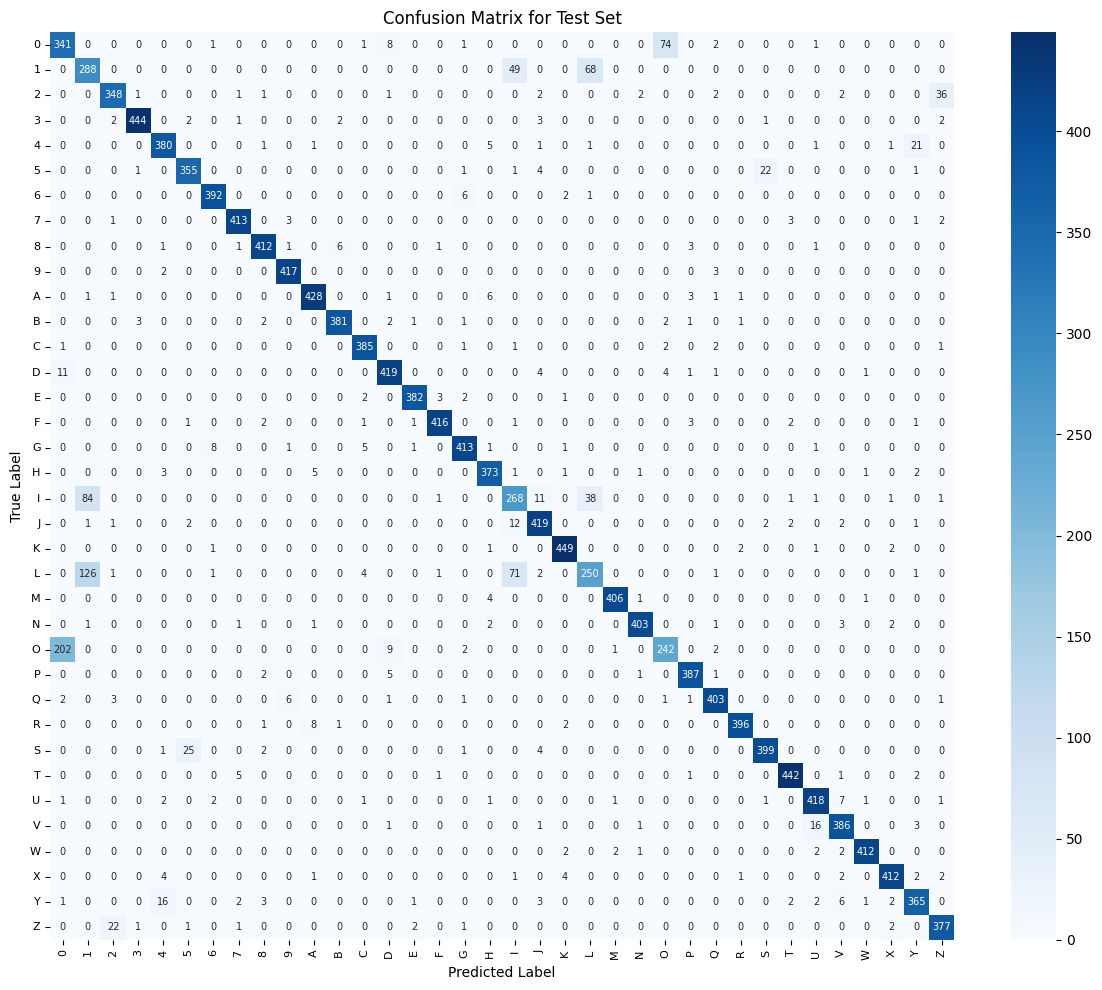


Confusion Matrix Analysis:
Classes most often confused (Top 5 true classes with most misclassifications):
- 'O' was misclassified as:
  - '0' (202 times)
  - 'D' (9 times)
  - 'G' (2 times)
- 'L' was misclassified as:
  - '1' (126 times)
  - 'I' (71 times)
  - 'C' (4 times)
- 'I' was misclassified as:
  - '1' (84 times)
  - 'L' (38 times)
  - 'J' (11 times)
- '1' was misclassified as:
  - 'L' (68 times)
  - 'I' (49 times)
- '0' was misclassified as:
  - 'O' (74 times)
  - 'D' (8 times)
  - 'Q' (2 times)
Common reasons for confusion can include visual similarities between classes (e.g., different types of birds that look alike), similar textures, or overlapping features.

Precision, recall, F1score

Metrics per class:
  Class '0': Precision=0.61, Recall=0.79, F1-score=0.69
  Class '1': Precision=0.57, Recall=0.71, F1-score=0.64
  Class '2': Precision=0.92, Recall=0.88, F1-score=0.90
  Class '3': Precision=0.99, Recall=0.97, F1-score=0.98
  Class '4': Precision=0.93, Recall=0.92, F1-sco

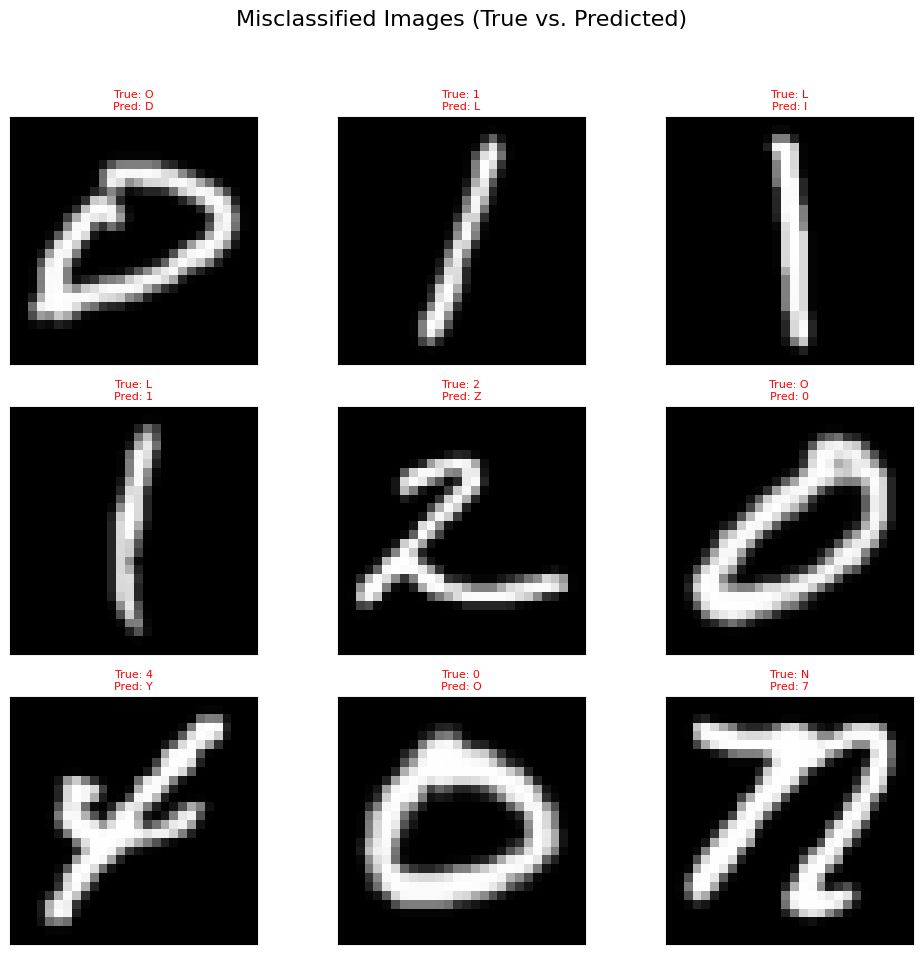

: 

In [ ]:

import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import torchvision 

print(" Evaluation and Analysis")


try:
    loaded_data = torch.load('dataset_loaders.pth', weights_only=False)
    test_loader = loaded_data['test_loader']
    train_loader = loaded_data['train_loader'] 
    val_loader = loaded_data['val_loader']    
    num_classes = loaded_data['num_classes']
    class_names = loaded_data['class_names']
    input_channels = loaded_data['input_channels']

    training_results = torch.load('training_results.pth')
except FileNotFoundError:
    print("Error: Required .pth files not found. Please run all previous steps.")
    exit()

class CustomCNN(nn.Module):
    def __init__(self, num_classes=36, input_channels=3):
        super(CustomCNN, self).__init__()

        self.conv1 = nn.Conv2d(in_channels=input_channels, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(in_features=64 * 7 * 7, out_features=512)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(0.5)

        self.fc2 = nn.Linear(in_features=512, out_features=num_classes)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)

        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)

        x = x.view(-1, 64 * 7 * 7)

        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout(x)

        x = self.fc2(x)
        return x

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = CustomCNN(num_classes=num_classes, input_channels=input_channels)
best_model_weights_path = 'best_cnn_model.pth'
try:
    model.load_state_dict(torch.load(best_model_weights_path, map_location=device))
    model.to(device)
    model.eval() 
    print(f"Best model loaded from '{best_model_weights_path}'.")
except FileNotFoundError:
    print(f"Error: Best model weights '{best_model_weights_path}' not found. Please ensure training completed successfully.")
    exit()

criterion = nn.CrossEntropyLoss()

def evaluate_model(model, dataloader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0
    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    avg_loss = running_loss / len(dataloader)
    accuracy = 100 * correct / total
    return avg_loss, accuracy, all_labels, all_predictions


print("\nModel Evaluation Results")
train_loss, train_acc, _, _ = evaluate_model(model, train_loader, criterion, device)
val_loss, val_acc, _, _ = evaluate_model(model, val_loader, criterion, device)
test_loss, test_acc, test_labels, test_predictions = evaluate_model(model, test_loader, criterion, device)

print(f"Final Training Loss: {train_loss:.4f}, Training Accuracy: {train_acc:.2f}%")
print(f"Final Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_acc:.2f}%")
print(f"Final Testing Loss: {test_loss:.4f}, Testing Accuracy: {test_acc:.2f}%")

print("\nShort Analysis:")
print(f"The model achieved a test accuracy of {test_acc:.2f}%.")
if train_acc > val_acc + 5 and train_acc > test_acc + 5:
    print("There is some indication of overfitting, as training accuracy is significantly higher than validation and test accuracy.")
    print("This suggests the model might be memorizing the training data to some extent, despite regularization.")
else:
    print("The training, validation, and test accuracies are relatively close, indicating good generalization and limited overfitting.")
print(f"The model's performance ({test_acc:.2f}%) meets the expected accuracy target of > 85%.")


print("\n Training History Plots")

best_optimizer_name_for_plot = max(training_results, key=lambda k: training_results[k]['final_val_accuracy'])
print(f"Displaying plots for the best performing optimizer {best_optimizer_name_for_plot}")

plot_data = training_results[best_optimizer_name_for_plot]
train_accuracies = plot_data['train_accuracies']
val_accuracies = plot_data['val_accuracies']
train_losses = plot_data['train_losses']
val_losses = plot_data['val_losses']
epochs_range = range(1, len(train_accuracies) + 1)


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, train_accuracies, label='Training Accuracy')
plt.plot(epochs_range, val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title(f'Training and Validation Accuracy ({best_optimizer_name_for_plot} Optimizer)')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(epochs_range, train_losses, label='Training Loss')
plt.plot(epochs_range, val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title(f'Training and Validation Loss ({best_optimizer_name_for_plot} Optimizer)')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


print("\nconfusion Matrix")
cm = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            annot_kws={"size": 7})
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Set')
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)
plt.tight_layout()
plt.show()

print("\nConfusion Matrix Analysis:")
misclassified_counts = {}
for i in range(num_classes):
    for j in range(num_classes):
        if i != j and cm[i, j] > 0:
            if class_names[i] not in misclassified_counts:
                misclassified_counts[class_names[i]] = []
            misclassified_counts[class_names[i]].append((class_names[j], cm[i, j]))

if misclassified_counts:
    print("Classes most often confused (Top 5 true classes with most misclassifications):")
    sorted_misclassified = sorted(misclassified_counts.items(), key=lambda item: sum(c[1] for c in item[1]), reverse=True)
    for true_class, confusions in sorted_misclassified[:5]:
        print(f"- '{true_class}' was misclassified as:")

        sorted_confusions = sorted(confusions, key=lambda item: item[1], reverse=True)
        for pred_class, count in sorted_confusions[:3]:
            print(f"  - '{pred_class}' ({count} times)")
else:
    print("No significant confusion between classes observed (or very low misclassification rates), indicating strong class separability")

print("Common reasons for confusion can include visual similarities between classes (e.g., different types of birds that look alike), similar textures, or overlapping features.")



print("\nPrecision, recall, F1score")
precision, recall, f1_score, _ = precision_recall_fscore_support(
    test_labels, test_predictions, average=None, labels=range(num_classes)
)

print("\nMetrics per class:")
for i, class_name in enumerate(class_names):
    print(f"  Class '{class_name}': Precision={precision[i]:.2f}, Recall={recall[i]:.2f}, F1-score={f1_score[i]:.2f}")

precision_macro, recall_macro, f1_score_macro, _ = precision_recall_fscore_support(
    test_labels, test_predictions, average='macro'
)
precision_weighted, recall_weighted, f1_score_weighted, _ = precision_recall_fscore_support(
    test_labels, test_predictions, average='weighted'
)

print(f"\nMacro Average Precision: {precision_macro:.2f}, Recall: {recall_macro:.2f}, F1-score: {f1_score_macro:.2f}")
print(f"Weighted Average Precision: {precision_weighted:.2f}, Recall: {recall_weighted:.2f}, F1-score: {f1_score_weighted:.2f}")


print("\n--- Misclassified Images Analysis ---")

original_full_dataset_path = train_loader.dataset.dataset.root 
original_full_dataset_transform = train_loader.dataset.dataset.transform 

full_dataset_reloaded_for_display = torchvision.datasets.ImageFolder(
    root=original_full_dataset_path,
    transform=original_full_dataset_transform
)


test_indices_in_full_dataset = test_loader.dataset.indices 

misclassified_indices = [idx for i, idx in enumerate(test_indices_in_full_dataset)
                         if test_labels[i] != test_predictions[i]]

if len(misclassified_indices) == 0:
    print("No misclassified images found in the test set")
else:
    print(f"Found {len(misclassified_indices)} misclassified images. Displaying a few...")
    num_to_display = min(9, len(misclassified_indices))
    fig_misclassified = plt.figure(figsize=(10, 10))
    fig_misclassified.suptitle("Misclassified Images (True vs. Predicted)", fontsize=16)

    misclassified_images_data = []
    model.eval()
    with torch.no_grad():

        for batch_inputs, batch_labels in test_loader:
            batch_inputs, batch_labels = batch_inputs.to(device), batch_labels.to(device)
            batch_outputs = model(batch_inputs)
            _, batch_predicted = torch.max(batch_outputs.data, 1)


            for i in range(batch_inputs.size(0)):
                true_label = batch_labels[i].item()
                predicted_label = batch_predicted[i].item()

                if true_label != predicted_label:
                    misclassified_images_data.append({
                        'image': batch_inputs[i].cpu(), 
                        'true_label': true_label,
                        'predicted_label': predicted_label
                    })
                    if len(misclassified_images_data) >= num_to_display:
                        break 
            if len(misclassified_images_data) >= num_to_display:
                break


    for i in range(min(num_to_display, len(misclassified_images_data))):
        item = misclassified_images_data[i]
        img_tensor_display = item['image']
        true_label_idx_display = item['true_label']
        predicted_label_idx_display = item['predicted_label']


        ax = fig_misclassified.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
        img = img_tensor_display.permute(1, 2, 0).numpy() 
  
        if img.shape[2] == 1:
            ax.imshow(img.squeeze(2), cmap='gray')
        else: 
            ax.imshow(img)

        true_class_name = class_names[true_label_idx_display]
        predicted_class_name = class_names[predicted_label_idx_display]
        ax.set_title(f"True: {true_class_name}\nPred: {predicted_class_name}", color="red", fontsize=8)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

  